# Introduction

Normally Hierachical Custering are two types
- Agglomerative Hierarchical Clustering: Bottom Up approach.
- Divisive clustering: Top Down approach.

Agglomerative clustering is more popular than Divisive clustering.

__Note:__ We will use __Complete Linkage__as the Linkage Criteria.

In [2]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

# Generating Random Data
We will be generating a set of data using the make_blobs class.

Input these parameters into make_blobs:

__Input:__

- __n_samples:__ The total number of points equally divided among clusters.
    - Choose a number from 10-1500

- __centers:__ The number of centers to generate, or the fixed center locations.
    - Choose arrays of $x,y$
    coordinates for generating the centers. Have 1-10 centers (ex. centers=$[[1,1], [2,5]]$)

- __cluster_std:__ The standard deviation of the clusters. The larger the number, the further apart the clusters.
    - Choose a number between 0.5-1.5

## Save the result to X1 and y1

In [8]:
X1, y1 = make_blobs(n_samples=150, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)

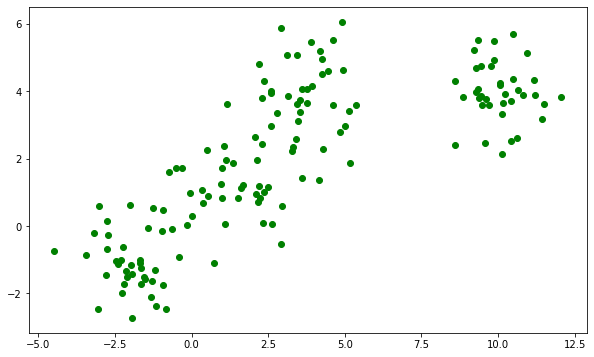

In [21]:
plt.figure(figsize=(10,6))
plt.scatter(X1[:, 0], X1[:, 1], marker='o', color='Green') 

# Agglomerative Clustering

We will start by clustering the random data points we just created.
The Agglomerative Clustering class will require two inputs:

- __n_clusters:__ The number of clusters to form as well as the number of centroids to generate.
    - Value will be: 4
- __linkage:__ Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.
    - Value will be: __'complete'__
    - __Note:__ It is recommended you try everything with __'average'__ as well

Save the result to a variable called agglom

## Distance Between Clusters
![](clustering_linkage.png)

In [15]:
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'average')
agglom

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=4)

# Modeling 

In [25]:
agglom.fit(X1,y1)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=4)

In [29]:
print(y1[:10])
agglom.labels_[:10]

[3 3 1 3 2 0 3 3 0 1]


array([1, 1, 3, 1, 0, 2, 1, 1, 2, 3])

Run the following code to show the clustering!
Remember to read the code and comments to gain more understanding on how the plotting works.

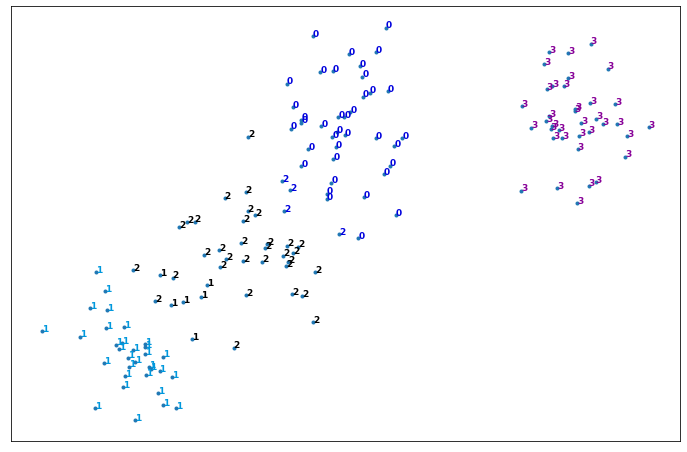

In [30]:
# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(12,8))

# These two lines of code are used to scale the data points down,
# Or else the data points will be scattered very far apart.

# Create a minimum and maximum range of X1.
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Get the average distance for X1.
X1 = (X1 - x_min) / (x_max - x_min)

# This loop displays all of the datapoints.
for i in range(X1.shape[0]):
    # Replace the data points with their respective cluster value 
    # (ex. 0) and is color coded with a colormap (plt.cm.spectral)
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})
    
# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])
#plt.axis('off')



# Display the plot of the original data before clustering
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
# Display the plot
plt.show()

## Dendrogram Associated for the Agglomerative Hierarchical Clustering

Remember that a __distance matrix__ contains the distance from each point to every other point of a dataset .
Use the function distance_matrix, which requires two inputs. Use the Feature Matrix, X2 as both inputs and save the distance matrix to a variable called dist_matrix

Remember that the distance values are symmetric, with a diagonal of 0's. This is one way of making sure your matrix is correct.
(print out dist_matrix to make sure it's correct)

In [37]:
dist_matrix = distance_matrix(X1,X1) 
print(dist_matrix)

[[0.         0.07621578 0.95187427 ... 0.95259261 0.94056763 0.94174603]
 [0.07621578 0.         0.91412032 ... 0.91671439 0.89892235 0.90932432]
 [0.95187427 0.91412032 0.         ... 0.02629549 0.05696766 0.07361761]
 ...
 [0.95259261 0.91671439 0.02629549 ... 0.         0.08284517 0.04805223]
 [0.94056763 0.89892235 0.05696766 ... 0.08284517 0.         0.12795239]
 [0.94174603 0.90932432 0.07361761 ... 0.04805223 0.12795239 0.        ]]
